# 取引履歴のデータ分析

In [1]:
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
matplotlib.use("Agg")

In [3]:
current_dir = %pwd
timestamp = os.path.basename(current_dir)

In [4]:
import sys
sys.path.append('/home/tsu-nera/repo/bakuchi/')
%cd '../../'

/home/ubuntu/repo/bakuchi


In [5]:
from src.utils.trade_analysis import TradeAnalysis

%reload_ext autoreload
%autoreload 2

In [6]:
ta = TradeAnalysis(timestamp)

In [7]:
ex1_trades = ta.get_ex1_trades_df()
ex2_trades = ta.get_ex2_trades_df()

In [8]:
len(ex1_trades), len(ex2_trades)

(156, 156)

## トレード結果

In [9]:
ta.display()

トレード情報
-------------------  -------------------
         レコード数                 7654
           取引回数                  156
           開始日時  2021-04-22 06:50:57
           終了日時  2021-04-22 09:16:25
        取引時間[H]              2:25:28
      取引単位[BTC]               0.0006
  利確しきい値[JPY]                 3000
損切りマージン[JPY]                 3000
-------------------  -------------------


トレード結果
-----------  ------
開始[JPY]     12915
終了[JPY]     12341
利益[JPY]      -574
開始[BTC]    0.0024
終了[BTC]    0.0024
利益[BTC]         0
開始[TOTAL]   27163
終了[TOTAL]   26237
利益[TOTAL]    -926
-----------  ------


トレード利益
  Bot利益    トレード利益    市場利益
---------  --------------  ----------
     -926        -574.935    -351.065


## 取引履歴

In [10]:
profit_df = ta.create_profit_df()

In [11]:
profit_df.tail(30)

,ex1_side,ex1_price,ex2_side,ex2_price,profit
timestamp,,,,,
2021-04-22 08:59:50,sell,3495.407,buy,3493.837,1.570
2021-04-22 08:59:53,buy,3496.169,sell,3494.448,-1.721
2021-04-22 09:00:10,buy,3496.117,sell,3498.165,2.048
2021-04-22 09:00:20,sell,3501.000,buy,3501.029,-0.029
2021-04-22 09:00:30,sell,3501.000,buy,3499.426,1.574
2021-04-22 09:00:34,buy,3501.448,sell,3501.501,0.053
2021-04-22 09:01:17,buy,3506.979,sell,3508.285,1.306
2021-04-22 09:01:33,sell,3508.799,buy,3509.809,-1.010
2021-04-22 09:01:40,sell,3508.805,buy,3507.238,1.567


In [12]:
round(sum(profit_df.profit), 3)

84.292

## トレードグラフ

In [13]:
ex1_ticks = ta.get_ex1_ticks_df()
ex2_ticks = ta.get_ex2_ticks_df()

In [14]:
len(ex1_ticks), len(ex2_ticks)

(7654, 7654)

In [15]:
ex1_bids = ex1_ticks['bid']
ex1_asks = ex1_ticks['ask']
ex2_bids = ex2_ticks['bid']
ex2_asks = ex2_ticks['ask']

fig1, ax1 = ta.get_fig(ex1_bids, ex2_asks)
fig2, ax2 = ta.get_fig(ex2_bids, ex1_asks)

ax1.set_title('exchange1 bid/exchange2 ask')
ax2.set_title('exchange2 bid/exchange1 ask')

Text(0.5, 1.0, 'exchange2 bid/exchange1 ask')

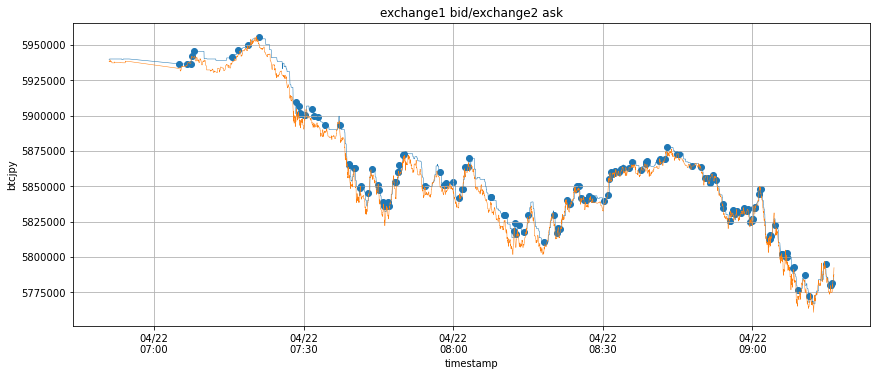

In [16]:
fig1

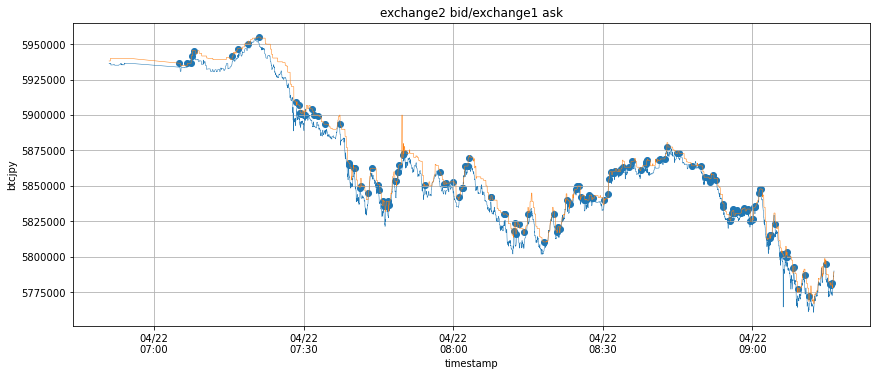

In [17]:
fig2